### multi linear regression is just the special edition of simple linear regression

* 1 input col 1 ,output col  simple linear regression is used
* more then 1 input col, 1 output col multiple linear regression is used 

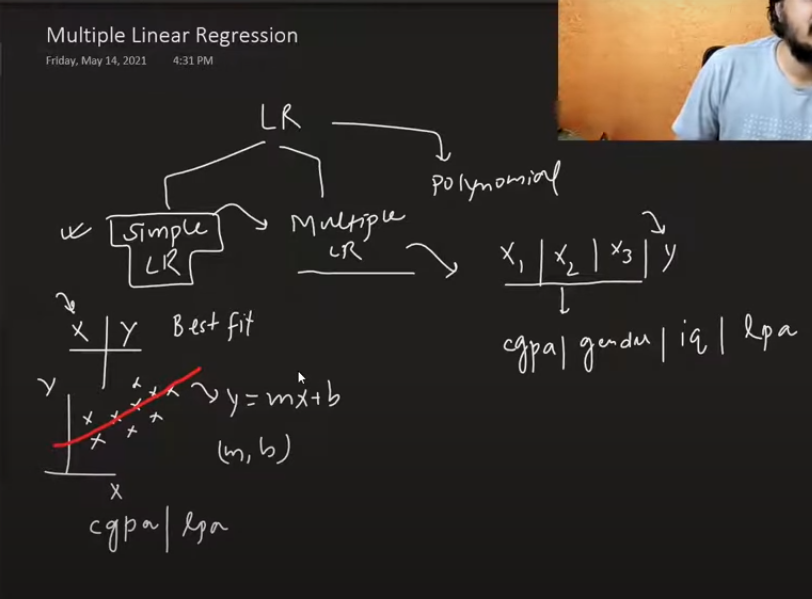

* eq of line (2d) 1x,1y
* eq of plane (3d) 2x,1y
* eq of hyperplane (4d and above)

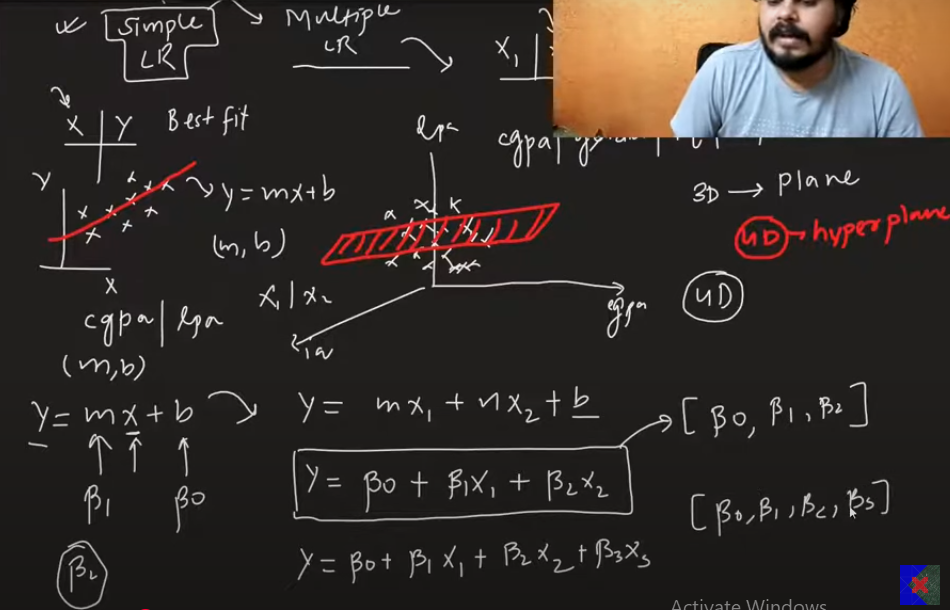

* general eq for n dimension 
* no. of coeficient = n + 1 (n is no.of input column)
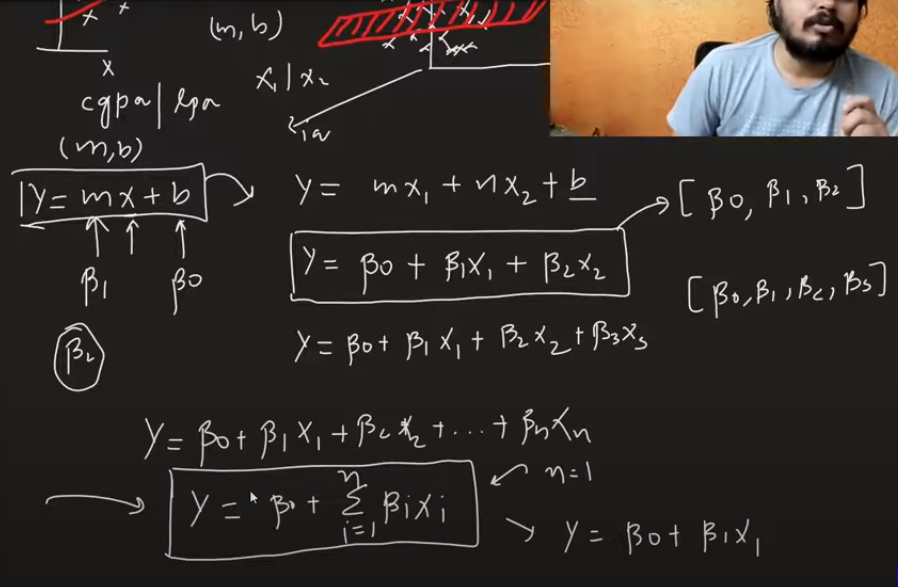

* the beta1 value tells us about the importance of that particular column
* if b1 is greater then b2 that means y depends on cgpa more then iq 
* if b2 is low then that means our result is less depend on iq
* b0(beta 0) represent offset that is if b1=0, b2=0 then b0 helps us to determine the result
* it is the intercept (b0)

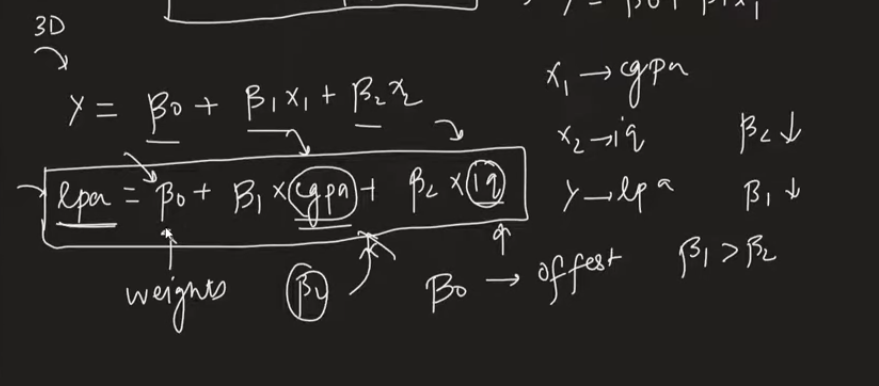

# lets goo-----------------------------------

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
x,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50) 
# the make_regression is used to create your own n-dimension linear regression dataset

In [3]:
df = pd.DataFrame({'feature1':x[:,0], 'feature2':x[:,1], 'target':y})

In [4]:
df.head()

,feature1,feature2,target
0,0.335052,-0.714464,-6.022000
1,0.139790,0.724331,114.729394
2,0.288565,-0.764473,24.823039
3,0.992051,0.516634,133.286966
4,0.880772,0.316467,181.250939


In [ ]:
df.shape #3d

(100, 3)

In [6]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

In [8]:
fig.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(x_test)

In [15]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("R2 score", r2_score(y_test, y_pred))

MAE 27.329786655913523
MSE 1050.4315218989166
R2 score 0.9228556629364066


In [16]:
# now just ignore it focus on output

In [18]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10, 10) 

z = z_final

# final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T


In [20]:

fig = px.scatter_3d(df, x='feature1', y ='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z = z))

fig.show()

In [21]:
lr.coef_

array([101.45224878,  76.4565144 ])

In [22]:
lr.intercept_

4.459713343349848